In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Transformacje
Naucz się stosować różne przekształcenia geometryczne do obrazów takich jak przesunięcie, obrót, afiniczna transformacja itp.

### Skalowanie
Skalowanie to zmiana wielkości obrazu. OpenCV posiada w tym celu funkcję cv2.resize(). Rozmiar obrazu można określić ręcznie lub można określić współczynnik skalowania. Stosowane są różne metody interpolacji. Preferowanymi metodami interpolacji są cv2.INTER_AREA dla kurczenia oraz cv2.INTER_CUBIC (slow) i cv2.INTER_LINEAR dla powiększania. Domyślnie, metodą interpolacji jest cv2.INTER_LINEAR dla wszystkich celów zmiany rozmiaru. Obraz wejściowy można zmienić jego wielkość za pomocą jednej z poniższych metod: 

In [16]:
image = cv2.imread('images/opencv_logo.png')
bigger_image = cv2.resize(image,None,fx=3, fy=2, interpolation = cv2.INTER_CUBIC)
smaller_image = cv2.resize(image,(50, 50), interpolation = cv2.INTER_AREA)

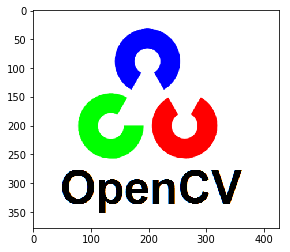

(378, 428, 3)


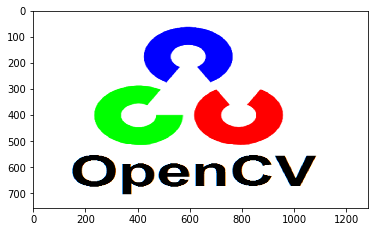

(756, 1284, 3)


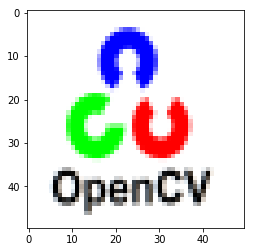

(50, 50, 3)


In [17]:
plt.imshow(image)
plt.show()
print(image.shape)

plt.imshow(bigger_image)
plt.show()
print(bigger_image.shape)

plt.imshow(smaller_image)
plt.show()
print(smaller_image.shape)

### Translacja
Translacja to przesunięcie obiektu. Jeśli znasz przesunięcie w kierunku $(x,y)$, niech będzie $(t_x,t_y)$, możesz utworzyć macierz przekształceń M w następujący sposób:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

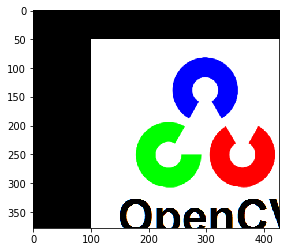

In [23]:
image = cv2.imread('images/opencv_logo.png')
rows,cols, _ = image.shape
transformation_matrix = np.float32([[1,0,100],[0,1,50]])
result = cv2.warpAffine(image, transformation_matrix, (cols,rows))
plt.imshow(result)

Trzeci argument funkcji cv2.warpAffine() to rozmiar obrazu wyjściowego, który powinien mieć postać **(szerokość, wysokość)**. Zapamiętaj szerokość = liczba kolumn, a wysokość = liczba wierszy.

### Rotacja
Obrót obrazu dla kąta $θ$ jest osiągany przez macierz transformacji: $$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

Ale OpenCV zapewnia skalowany obrót z regulowanym środkiem obrotu, dzięki czemu można go obracać w dowolnym miejscu. Zmodyfikowana matryca transformacji jest podawana przez

$$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$$
gdzie
$$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$$

Aby znaleźć tę macierz transformacji, OpenCV udostępnia funkcję, __cv2.getRotationMatrix2D__. Sprawdź poniższy przykład, który obraca obraz o 90 stopni względem środka bez żadnego skalowania. 

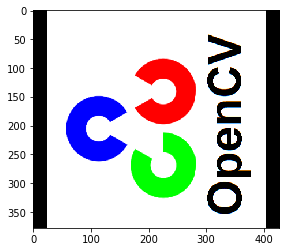

In [33]:
image = cv2.imread('images/opencv_logo.png')
rows,cols, _ = image.shape

rotation_point = (cols / 2, rows / 2)
angle = 90
scale = 1

transformation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, scale)

result = cv2.warpAffine(image, transformation_matrix, (cols,rows))
plt.imshow(result)

Problem? Ucięty obraz

### Transformacja afiniczna
W przekształceniu afinicznym, wszystkie linie równoległe na oryginalnym obrazie będą nadal równoległe na obrazie wyjściowym. Aby znaleźć macierz transformacji, potrzebujemy trzech punktów z obrazu wejściowego i odpowiadających im lokalizacji w obrazie wyjściowym. Następnie funkcja __cv2.getAffineTransform__ utworzy macierz 2x3, która zostanie przekazana wykorzystana w znanej już funkcji __cv2.warpAffine__.

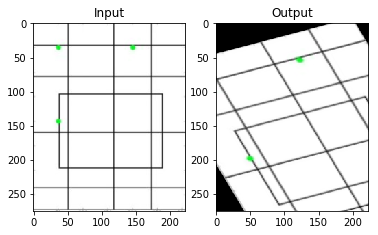

In [41]:
image = cv2.imread('images/affine.png')
rows,cols,_ = image.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

transformation_matrix = cv2.getAffineTransform(pts1, pts2)

result = cv2.warpAffine(image, transformation_matrix, (cols,rows))

plt.subplot(121),plt.imshow(image), plt.title('Input')
plt.subplot(122),plt.imshow(result), plt.title('Output')
plt.show()

### Transformacja perspektywiczna
Do przeprowadzenia transformacji perspektywicznej potrzebna jest macierz transformacji 3x3. Do znalezienia tej macierzy przekształceń potrzebne są 4 punkty na obrazie wejściowym i odpowiadające im punkty na obrazie wyjściowym. Spośród tych 4 punktów, 3 z nich nie powinny być współliniowe. Następnie macierz transformacji można znaleźć za pomocą funkcji __cv2.getPerspectiveTransform__, którą następnie należy zastosować w funkcji  __cv2.warpPerspective__.


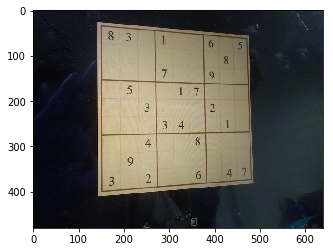

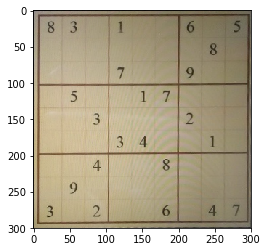

In [48]:
image = cv2.imread('images/sudoku.png')
rows,cols,_ = image.shape

pts1 = np.float32([[140,25],[475,56],[143,409],[487,383]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

transformation_matrix = cv2.getPerspectiveTransform(pts1,pts2)

result = cv2.warpPerspective(image, transformation_matrix, (300,300))

plt.imshow(image)
plt.show()
plt.imshow(result)